In [1]:
# Importing all the libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from statistics import mode
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial import distance
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as sch
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.font_manager as font_manager


In [2]:
# read in data
df = pd.read_csv('laterality_data.csv')

In [3]:
# check in on data
df.head()

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,...,LI MD,LI Volume,TOI,Control,category,hand,Hand,ROI 1,ROI 2,Type
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,...,0.015758,-0.068848,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,...,NaN,0.167642,no,yes,Language,NaN,NaN,Frontal,Temporal,Association
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,...,NaN,0.010843,yes,no,Vertical,NaN,NaN,Frontal,Frontal,Association
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,...,0.002403,-0.012036,no,no,Motor,NaN,NaN,Medulla,Motor Cortex,Projection
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,...,-0.014053,-0.066723,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection


In [4]:
# Count the data
df.count()

Match Flag            44648
subjectID             44648
Data                  44648
Order_FA_child        44648
Order_volume_child    44648
Order_MD_child        44648
structureID           44648
gender                44648
gender_non            44648
Age_gr_12             44648
Age Group             44648
Age                   44648
LI FA                 41241
LI MD                 41272
LI Volume             41040
TOI                   44648
Control               44648
category              44648
hand                  43510
Hand                  43390
ROI 1                 44648
ROI 2                 44648
Type                  44648
dtype: int64

In [5]:
# Creating new DataFrame without Hand data b/c not necessary.
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21]
df = df[df.columns[cols]]
df

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,Age Group,Age,LI FA,LI MD,LI Volume,TOI,Control,category,ROI 1,ROI 2
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,Child,3.416667,-0.003511,0.015758,-0.068848,no,no,Cerebellar,Frontal,Cerebellum
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,Child,3.416667,0.034870,NaN,0.167642,no,yes,Language,Frontal,Temporal
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,Child,3.416667,-0.010014,NaN,0.010843,yes,no,Vertical,Frontal,Frontal
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,Child,3.416667,NaN,0.002403,-0.012036,no,no,Motor,Medulla,Motor Cortex
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,Child,3.416667,0.006478,-0.014053,-0.066723,no,no,Cerebellar,Frontal,Cerebellum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44643,3,CC721374,CAMCAN,MotorThalamic,MotorThalamic,MotorThalamic,MotorThalamic,0,M,80->,Senior,86.000000,0.046822,-0.035798,0.025188,no,no,Cerebellar,Thalamic,Motor Cortex
44644,3,CC721374,CAMCAN,pArc,pArc,pArc,pArc,0,M,80->,Senior,86.000000,-0.047697,0.038274,-0.058535,yes,no,Posterior Vertical,Temporal,Parietal
44645,3,CC721374,CAMCAN,ParietoThalamic,ParietoThalamic,ParietoThalamic,ParietoThalamic,0,M,80->,Senior,86.000000,NaN,-0.017686,-0.037982,no,no,Thalamic,Parietal,Thalamic
44646,3,CC721374,CAMCAN,SpinoThalamic,SpinoThalamic,SpinoThalamic,SpinoThalamic,0,M,80->,Senior,86.000000,0.019873,-0.000048,0.016270,no,no,Thalamic,Medulla,Thalamic


In [6]:
# dropping all NA's or missing data
df.dropna(how = 'any', inplace = True)
df

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,Age Group,Age,LI FA,LI MD,LI Volume,TOI,Control,category,ROI 1,ROI 2
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,Child,3.416667,-0.003511,0.015758,-0.068848,no,no,Cerebellar,Frontal,Cerebellum
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,Child,3.416667,0.006478,-0.014053,-0.066723,no,no,Cerebellar,Frontal,Cerebellum
5,3,P1158,PING,ContraMotorCerebellar,ContraMotorCerebellar,ContraMotorCerebellar,ContraMotorCerebellar,0,M,0-12,Child,3.416667,0.008928,-0.000257,-0.049949,no,no,Cerebellar,Motor,Cerebellum
10,3,P1158,PING,MotorCerebellar,MotorCerebellar,MotorCerebellar,MotorCerebellar,0,M,0-12,Child,3.416667,0.012617,0.012994,-0.057997,no,no,Cerebellar,Motor,Cerebellum
11,3,P1158,PING,OccipitoCerebellar,OccipitoCerebellar,OccipitoCerebellar,OccipitoCerebellar,0,M,0-12,Child,3.416667,-0.007761,0.015024,0.064990,no,no,Cerebellar,Occipital,Cerebellum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44640,3,CC721374,CAMCAN,VOF,VOF,VOF,VOF,0,M,80->,Senior,86.000000,-0.070059,0.028502,-0.019443,yes,no,Vertical,Occipital,Occipital
44641,3,CC721374,CAMCAN,FrontoThalamic,FrontoThalamic,FrontoThalamic,FrontoThalamic,0,M,80->,Senior,86.000000,0.029330,-0.006677,0.168788,no,no,Thalamic,Frontal,Thalamic
44643,3,CC721374,CAMCAN,MotorThalamic,MotorThalamic,MotorThalamic,MotorThalamic,0,M,80->,Senior,86.000000,0.046822,-0.035798,0.025188,no,no,Cerebellar,Thalamic,Motor Cortex
44644,3,CC721374,CAMCAN,pArc,pArc,pArc,pArc,0,M,80->,Senior,86.000000,-0.047697,0.038274,-0.058535,yes,no,Posterior Vertical,Temporal,Parietal


In [7]:
# Checking the number of data points again.
df.count()

Match Flag            35595
subjectID             35595
Data                  35595
Order_FA_child        35595
Order_volume_child    35595
Order_MD_child        35595
structureID           35595
gender                35595
gender_non            35595
Age_gr_12             35595
Age Group             35595
Age                   35595
LI FA                 35595
LI MD                 35595
LI Volume             35595
TOI                   35595
Control               35595
category              35595
ROI 1                 35595
ROI 2                 35595
dtype: int64

# Creating the Heat and Cluster Maps!

In [8]:
# Creating Pivot Table for necessary organization of data that will be inputed into heat and clustermaps!

heatmap_data_before = pd.pivot_table(df, values='LI Volume',
                             index=['Order_volume_child'], # White Matter Tracts Ordered by LI (Sandra chnage var name)
                             columns='Age Group')
heatmap_data_before.dropna(inplace=True)
heatmap_data_before.index.names = ['Regions of the Brain']

heatmap_data_before

Age Group,Adolescent,Adult,Child,Middle Age,Senior
Regions of the Brain,,,,,
AnterioFrontoCerebellar,-0.024312,-0.089752,-0.046935,-0.018805,-0.015686
Arc,0.095702,0.037475,0.076423,0.078019,0.072840
Aslant,0.040627,0.012830,0.021328,0.053189,0.042118
Baum,0.045497,-0.029186,-0.028126,0.012251,-0.027663
CST,-0.002015,0.029220,0.007613,0.021696,0.016426
Cingulum,0.004242,0.024840,-0.077383,0.000372,-0.012267
ContraAnterioFrontoCerebellar,-0.004460,0.048568,-0.089609,0.036844,0.024312
ContraMotorCerebellar,0.041420,0.056675,0.002974,0.048046,0.033283
FrontoThalamic,0.013017,0.052854,0.014546,0.023065,0.006039


Age Group,Child,Adolescent,Adult,Middle Age,Senior
Regions of the Brain,,,,,
Uncinate,-0.219212,-0.085167,-0.049040,-0.024945,-0.040844
AnterioFrontoCerebellar,-0.046935,-0.024312,-0.089752,-0.018805,-0.015686
OccipitoCerebellar,-0.072708,0.037503,-0.055623,-0.014740,-0.053793
IFOF,-0.039802,-0.022858,0.018180,-0.057871,-0.065703
ILF,-0.002230,-0.074707,-0.019770,-0.037977,-0.040077
VOF,0.017447,-0.035873,-0.057077,-0.063941,-0.078655
Arc,0.076423,0.095702,0.037475,0.078019,0.072840
ThalamicoCerebellar,0.025078,0.063352,0.000289,0.097445,0.051862
Aslant,0.021328,0.040627,0.012830,0.053189,0.042118


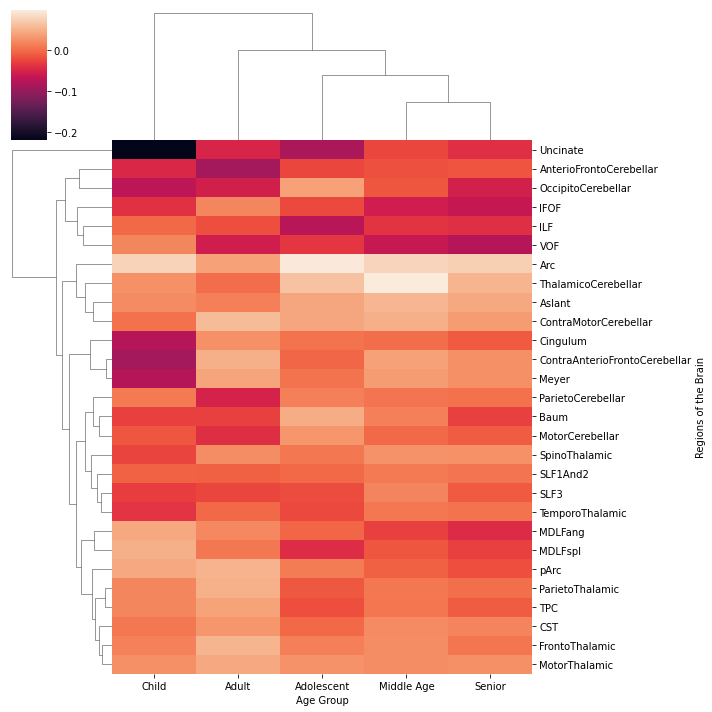

In [9]:
# Reorderinng the clustermap!

area_clustermap = sns.clustermap(heatmap_data_before);

# set the desired order of groups
groups = ['Child', 'Adolescent', 'Adult', 'Middle Age', 'Senior'] 

# reorder indexes/indices besed on the desired order
new_order = []
for group in groups:
    inds = area_clustermap.data2d.columns.str.startswith(group)
    inds_locs = np.where(inds)[0].tolist()
    new_order += inds_locs
    
## reorder df based on the new order
ordered_df_area = area_clustermap.data2d.iloc[:, new_order]

ordered_df_area


In [23]:
print("mIin", df['LI Volume'].min(), '  Max', df['LI Volume'].max())

mIin -0.8052249344   Max 0.6494302355


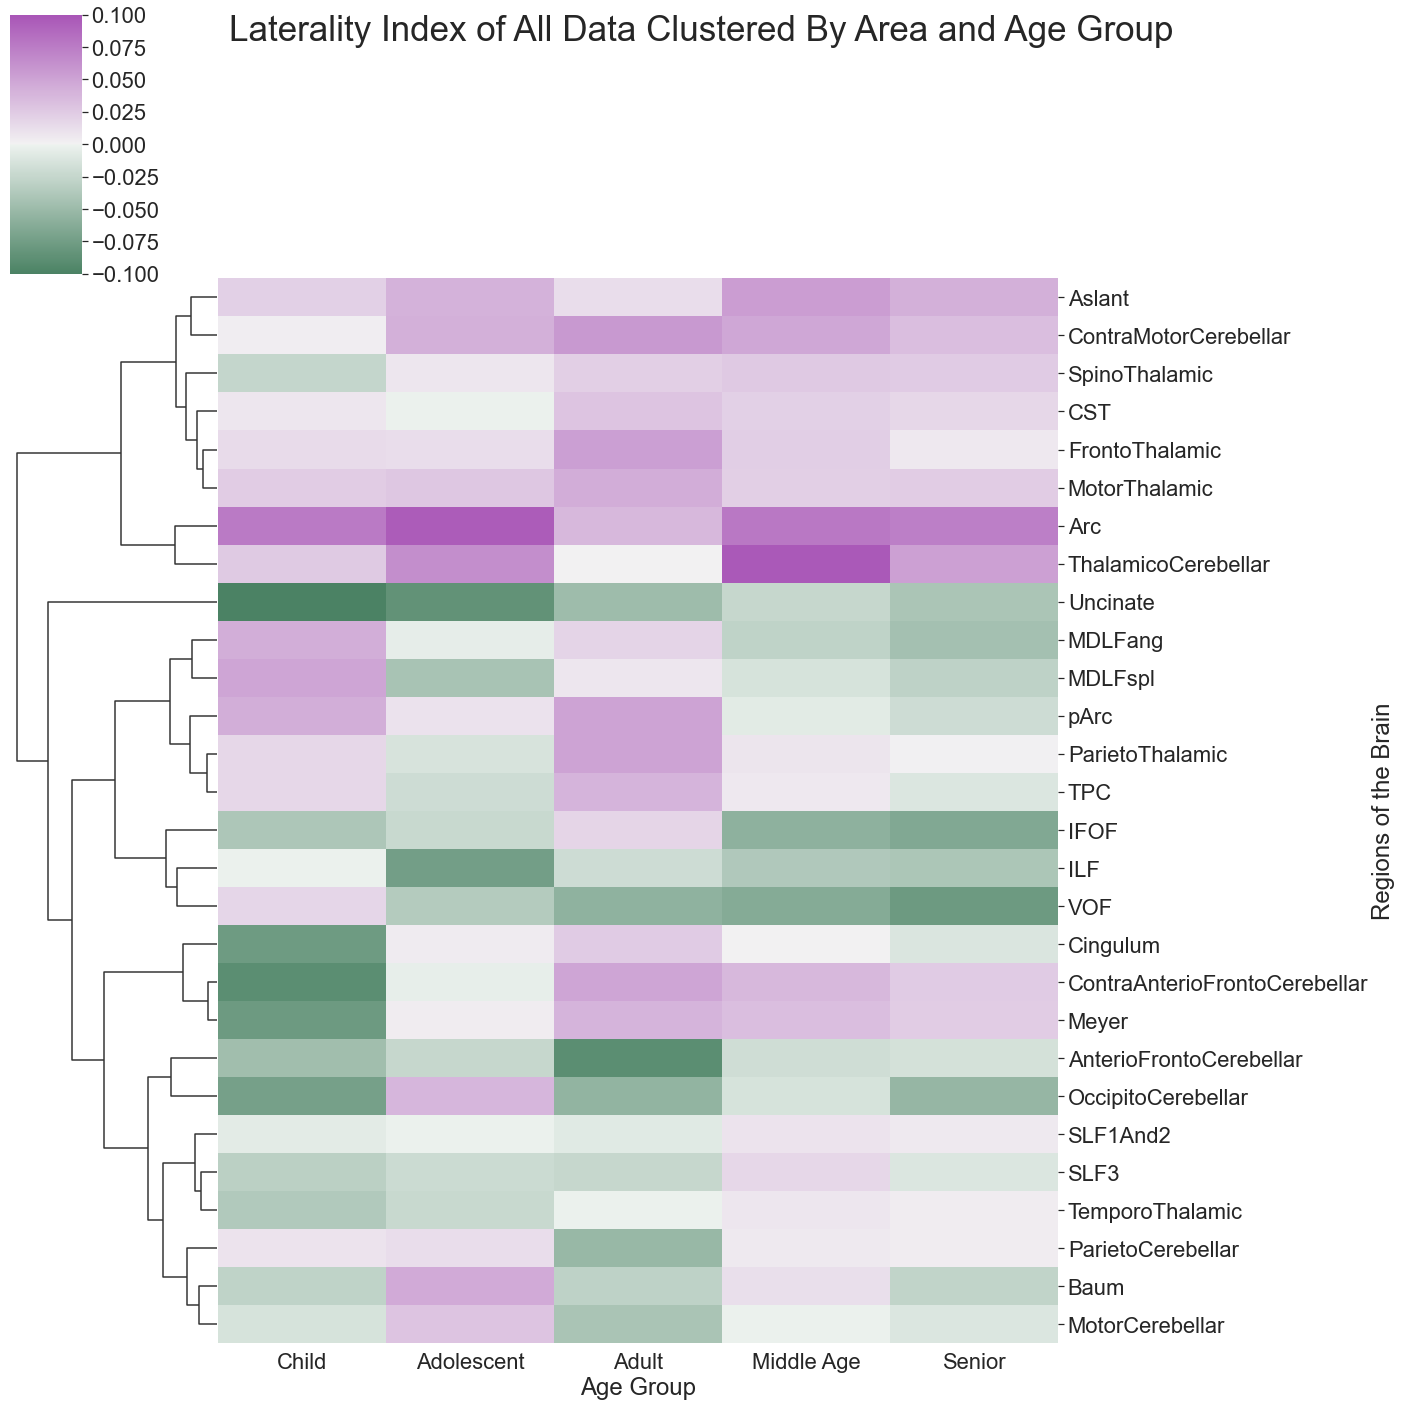

In [32]:

vcenter = 0 #Creating the center for all the datapoints.
vmin, vmax = -0.1, 0.1 # max and min values from graph below
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax) # normalizing the data around that point.
colormap = sns.diverging_palette(145, 300, s=60, as_cmap=True) # creating color map for the clustermap.

## Run clustermap.
sns.set(font_scale = 2)




g = sns.clustermap(ordered_df_area,
              figsize=(20,20),
              row_cluster=True,
              col_cluster=False,
              norm = normalize,
              method = 'ward',
              tree_kws= dict(linewidths=1.5),
              cmap=colormap).fig.suptitle('Laterality Index of All Data Clustered By Area and Age Group', 
                                     fontsize =35)

# fig = g.get_figure()
# fig.savefig('cluster.jpg', bbox_inches='tight', dpi=150)


# Creating Parallel Plots of the Clusters

In [11]:
transposed  = ordered_df_area.T

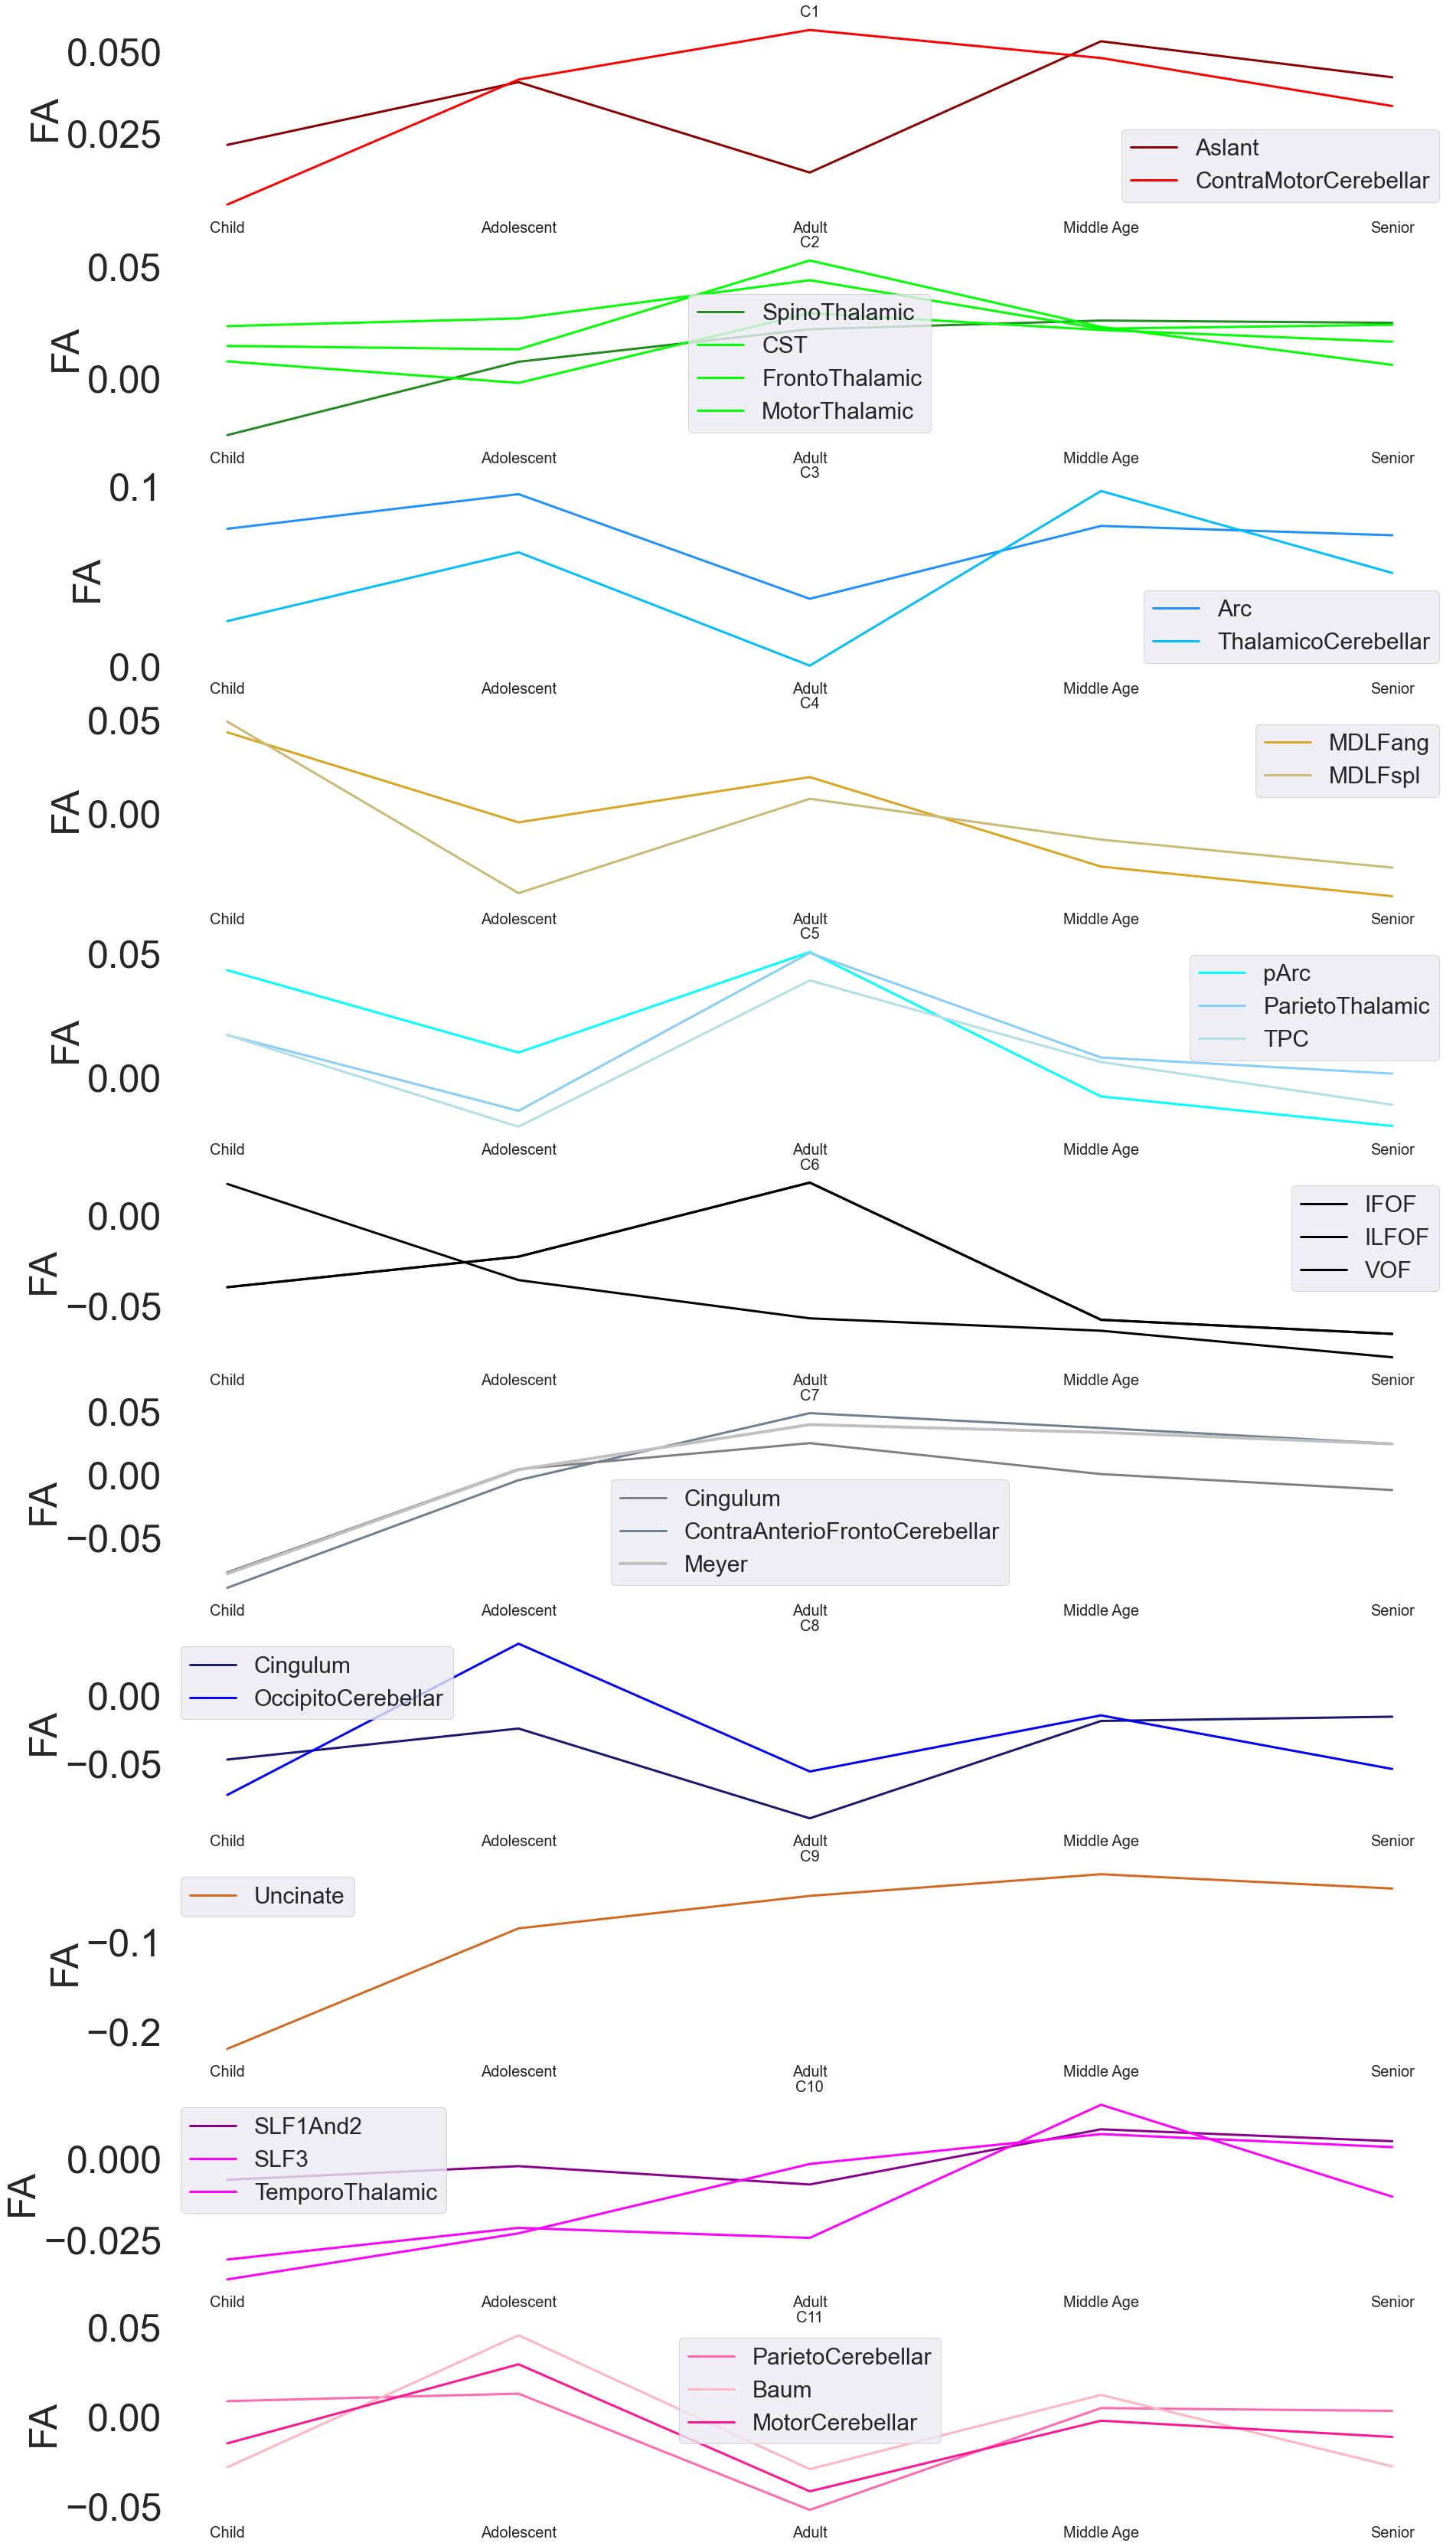

In [34]:
fig2, ax2 = plt.subplots(11, 1, figsize=(30, 60))


sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'Aslant', 
             label='Aslant', 
            color = 'darkred',
            ax= ax2[0], lw = 3).set(title='1st Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'ContraMotorCerebellar', color = 'red',
             label = 'ContraMotorCerebellar',ax= ax2[0] , lw = 3)



sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'SpinoThalamic', color = 'forestgreen',
             label='SpinoThalamic',
            ax= ax2[1], lw = 3).set(title='2nd Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'CST', color = 'lime',
             label='CST', ax= ax2[1], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'FrontoThalamic', color = 'lime',
             label='FrontoThalamic', ax= ax2[1], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'MotorThalamic', color = 'lime',
             label='MotorThalamic', ax= ax2[1], lw = 3)




sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'Arc', color = 'dodgerblue',
            label='Arc',
            ax= ax2[2], lw = 3).set(title='3rd Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'ThalamicoCerebellar', 
             color = 'deepskyblue',label='ThalamicoCerebellar',ax= ax2[2], lw = 3)




sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'MDLFang', 
             color = 'goldenrod',label='MDLFang',
            ax= ax2[3], lw = 3).set(title='4th Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'MDLFspl',  
             color = 'y',label='MDLFspl',  ax= ax2[3], lw = 3)



sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'pArc', color = 'aqua',
             label='pArc',
            ax= ax2[4], lw = 3).set(title='5th Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'ParietoThalamic', color = 'lightskyblue',
             label='ParietoThalamic', ax= ax2[4], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'TPC', color = 'powderblue', 
             label='TPC', ax= ax2[4], lw = 3)


sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'IFOF', color = 'black',
             label='IFOF',
            ax= ax2[5], lw = 3).set(title='6th Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'IFOF', color = 'black',
             label='ILFOF',
            ax= ax2[5], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'VOF', color = 'black',
             label='VOF',
            ax= ax2[5], lw = 3)


sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'Cingulum', color = 'gray',
             label='Cingulum',
            ax= ax2[6], lw = 3).set(title='7th Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'ContraAnterioFrontoCerebellar', 
             color = 'slategray', label='ContraAnterioFrontoCerebellar',ax= ax2[6], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'Meyer',
             color = 'silver', label='Meyer',ax= ax2[6], lw = 4)


sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'AnterioFrontoCerebellar', 
            color = 'midnightblue', label='Cingulum',
            ax= ax2[7], lw = 3).set(title='8th Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'OccipitoCerebellar', color = 'blue', 
             label='OccipitoCerebellar', ax= ax2[7], lw = 3)



sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'Uncinate', 
             color = 'chocolate',label='Uncinate',
            ax= ax2[8], lw = 3).set(title='9th Cluster')


sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'SLF1And2',
             color = 'darkmagenta', label='SLF1And2', ax= ax2[9], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'SLF3', 
             color = 'magenta',label='SLF3', ax= ax2[9], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'TemporoThalamic', 
             color = 'magenta',label='TemporoThalamic', ax= ax2[9], lw = 3)

sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'ParietoCerebellar', 
             color = 'hotpink',label='ParietoCerebellar',ax= ax2[10], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'Baum', 
             color = 'lightpink', label='Baum',ax= ax2[10], lw = 3)
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'MotorCerebellar', 
             color = 'deeppink', label='MotorCerebellar',ax= ax2[10], lw = 3)


sns.set(font_scale = 2)


ax2[0].set_title('C1', fontsize = 20)
ax2[0].set_ylabel('FA', fontsize = 50)
ax2[0].tick_params(axis='y', which='major', labelsize = 50)
ax2[0].tick_params(axis='x', which='major', labelsize = 20)
ax2[0].set_facecolor("white")
ax2[0].axis('on')
ax2[0].legend(fontsize = 30)


ax2[1].set_title('C2', fontsize = 20)
ax2[1].set_ylabel('FA', fontsize = 50)
ax2[1].tick_params(axis='y', which='major', labelsize = 50)
ax2[1].tick_params(axis='x', which='major', labelsize = 20)
ax2[1].set_facecolor("white")
ax2[1].legend(fontsize = 30)

ax2[2].set_title('C3', fontsize = 20)
ax2[2].set_ylabel('FA', fontsize = 50)
ax2[2].tick_params(axis='y', which='major', labelsize = 50)
ax2[2].tick_params(axis='x', which='major', labelsize = 20)
ax2[2].set_facecolor("white")
ax2[2].legend(fontsize = 30)

ax2[3].set_title('C4', fontsize = 20)
ax2[3].set_ylabel('FA', fontsize = 50)
ax2[3].tick_params(axis='y', which='major', labelsize = 50)
ax2[3].tick_params(axis='x', which='major', labelsize = 20)
ax2[3].set_facecolor("white")
ax2[3].legend(fontsize = 30)

ax2[4].set_title('C5', fontsize = 20)
ax2[4].set_ylabel('FA', fontsize = 50)
ax2[4].tick_params(axis='y', which='major', labelsize = 50)
ax2[4].tick_params(axis='x', which='major', labelsize = 20)
ax2[4].set_facecolor("white")
ax2[4].legend(fontsize = 30)

ax2[5].set_title('C6', fontsize = 20)
ax2[5].set_ylabel('FA', fontsize = 50)
ax2[5].tick_params(axis='y', which='major', labelsize = 50)
ax2[5].tick_params(axis='x', which='major', labelsize = 20)
ax2[5].set_facecolor("white")
ax2[5].legend(fontsize = 30)

ax2[6].set_title('C7', fontsize = 20)
ax2[6].set_ylabel('FA', fontsize = 50)
ax2[6].tick_params(axis='y', which='major', labelsize = 50)
ax2[6].tick_params(axis='x', which='major', labelsize = 20)
ax2[6].set_facecolor("white")
ax2[6].legend(fontsize = 30)

ax2[7].set_title('C8', fontsize = 20)
ax2[7].set_ylabel('FA', fontsize = 50)
ax2[7].tick_params(axis='y', which='major', labelsize = 50)
ax2[7].tick_params(axis='x', which='major', labelsize = 20)
ax2[7].set_facecolor("white")
ax2[7].legend(fontsize = 30)

ax2[8].set_title('C9', fontsize = 20)
ax2[8].set_ylabel('FA', fontsize = 50)
ax2[8].tick_params(axis='y', which='major', labelsize = 50)
ax2[8].tick_params(axis='x', which='major', labelsize = 20)
ax2[8].set_facecolor("white")
ax2[8].legend(fontsize = 30)


ax2[9].set_title('C10', fontsize = 20)
ax2[9].set_ylabel('FA', fontsize = 50)
ax2[9].tick_params(axis='y', which='major', labelsize = 50)
ax2[9].tick_params(axis='x', which='major', labelsize = 20)
ax2[9].set_facecolor("white")
ax2[9].legend(fontsize = 30)

ax2[10].set_title('C11', fontsize = 20)
ax2[10].set_ylabel('FA', fontsize = 50)
ax2[10].tick_params(axis='y', which='major', labelsize = 50)
ax2[10].tick_params(axis='x', which='major', labelsize = 20)
ax2[10].set_facecolor("white")
ax2[10].legend(fontsize = 30)
# Add helvetica.
# Check colors for the second one.
# Do this for MD and Volume

In [13]:
order = pd.DataFrame(ordered_df_area)
order

Age Group,Child,Adolescent,Adult,Middle Age,Senior
Regions of the Brain,,,,,
Uncinate,-0.219212,-0.085167,-0.049040,-0.024945,-0.040844
AnterioFrontoCerebellar,-0.046935,-0.024312,-0.089752,-0.018805,-0.015686
OccipitoCerebellar,-0.072708,0.037503,-0.055623,-0.014740,-0.053793
IFOF,-0.039802,-0.022858,0.018180,-0.057871,-0.065703
ILF,-0.002230,-0.074707,-0.019770,-0.037977,-0.040077
VOF,0.017447,-0.035873,-0.057077,-0.063941,-0.078655
Arc,0.076423,0.095702,0.037475,0.078019,0.072840
ThalamicoCerebellar,0.025078,0.063352,0.000289,0.097445,0.051862
Aslant,0.021328,0.040627,0.012830,0.053189,0.042118


# Clustering Again (Combining)


In [14]:
transposed

Regions of the Brain,Uncinate,AnterioFrontoCerebellar,OccipitoCerebellar,IFOF,ILF,VOF,Arc,ThalamicoCerebellar,Aslant,ContraMotorCerebellar,...,SLF3,TemporoThalamic,MDLFang,MDLFspl,pArc,ParietoThalamic,TPC,CST,FrontoThalamic,MotorThalamic
Age Group,,,,,,,,,,,,,,,,,,,,,
Child,-0.219212,-0.046935,-0.072708,-0.039802,-0.002230,0.017447,0.076423,0.025078,0.021328,0.002974,...,-0.030961,-0.037059,0.043161,0.048929,0.043284,0.017079,0.017049,0.007613,0.014546,0.023440
Adolescent,-0.085167,-0.024312,0.037503,-0.022858,-0.074707,-0.035873,0.095702,0.063352,0.040627,0.041420,...,-0.021256,-0.022934,-0.005057,-0.042964,0.009994,-0.013545,-0.019980,-0.002015,0.013017,0.026852
Adult,-0.049040,-0.089752,-0.055623,0.018180,-0.019770,-0.057077,0.037475,0.000289,0.012830,0.056675,...,-0.024325,-0.001651,0.019179,0.007553,0.050599,0.050286,0.039162,0.029220,0.052854,0.044017
Middle Age,-0.024945,-0.018805,-0.014740,-0.057871,-0.037977,-0.063941,0.078019,0.097445,0.053189,0.048046,...,0.016510,0.007511,-0.028745,-0.014292,-0.007729,0.008004,0.006173,0.021696,0.023065,0.022269
Senior,-0.040844,-0.015686,-0.053793,-0.065703,-0.040077,-0.078655,0.072840,0.051862,0.042118,0.033283,...,-0.011691,0.003519,-0.044599,-0.029303,-0.019704,0.001477,-0.011073,0.016426,0.006039,0.024037


In [15]:
transposed = pd.DataFrame(transposed)

In [16]:
slasoc_comb = transposed[['SLF3', 'Aslant', 'OccipitoCerebellar']].mean(axis=1)

In [17]:
cingT = transposed[['Cingulum', 'TemporoThalamic']].mean(axis=1)

In [18]:
spinmdmotor = transposed[['SpinoThalamic', 'MDLFang', 'MotorThalamic']].mean(axis=1)

In [19]:
arcbamey = transposed[['Arc','Baum', 'Meyer']].mean(axis=1)

In [20]:
thilmotifmdl = transposed[['ThalamicoCerebellar', 'ILF', 'MotorCerebellar', 'IFOF', 'MDLFspl']].mean(axis=1)

In [21]:
uncstparcontrapar = transposed[['Uncinate', 'CST', 'ParietoThalamic', 'ContraMotorCerebellar', 'ParietoCerebellar']].mean(axis=1)

<AxesSubplot:>

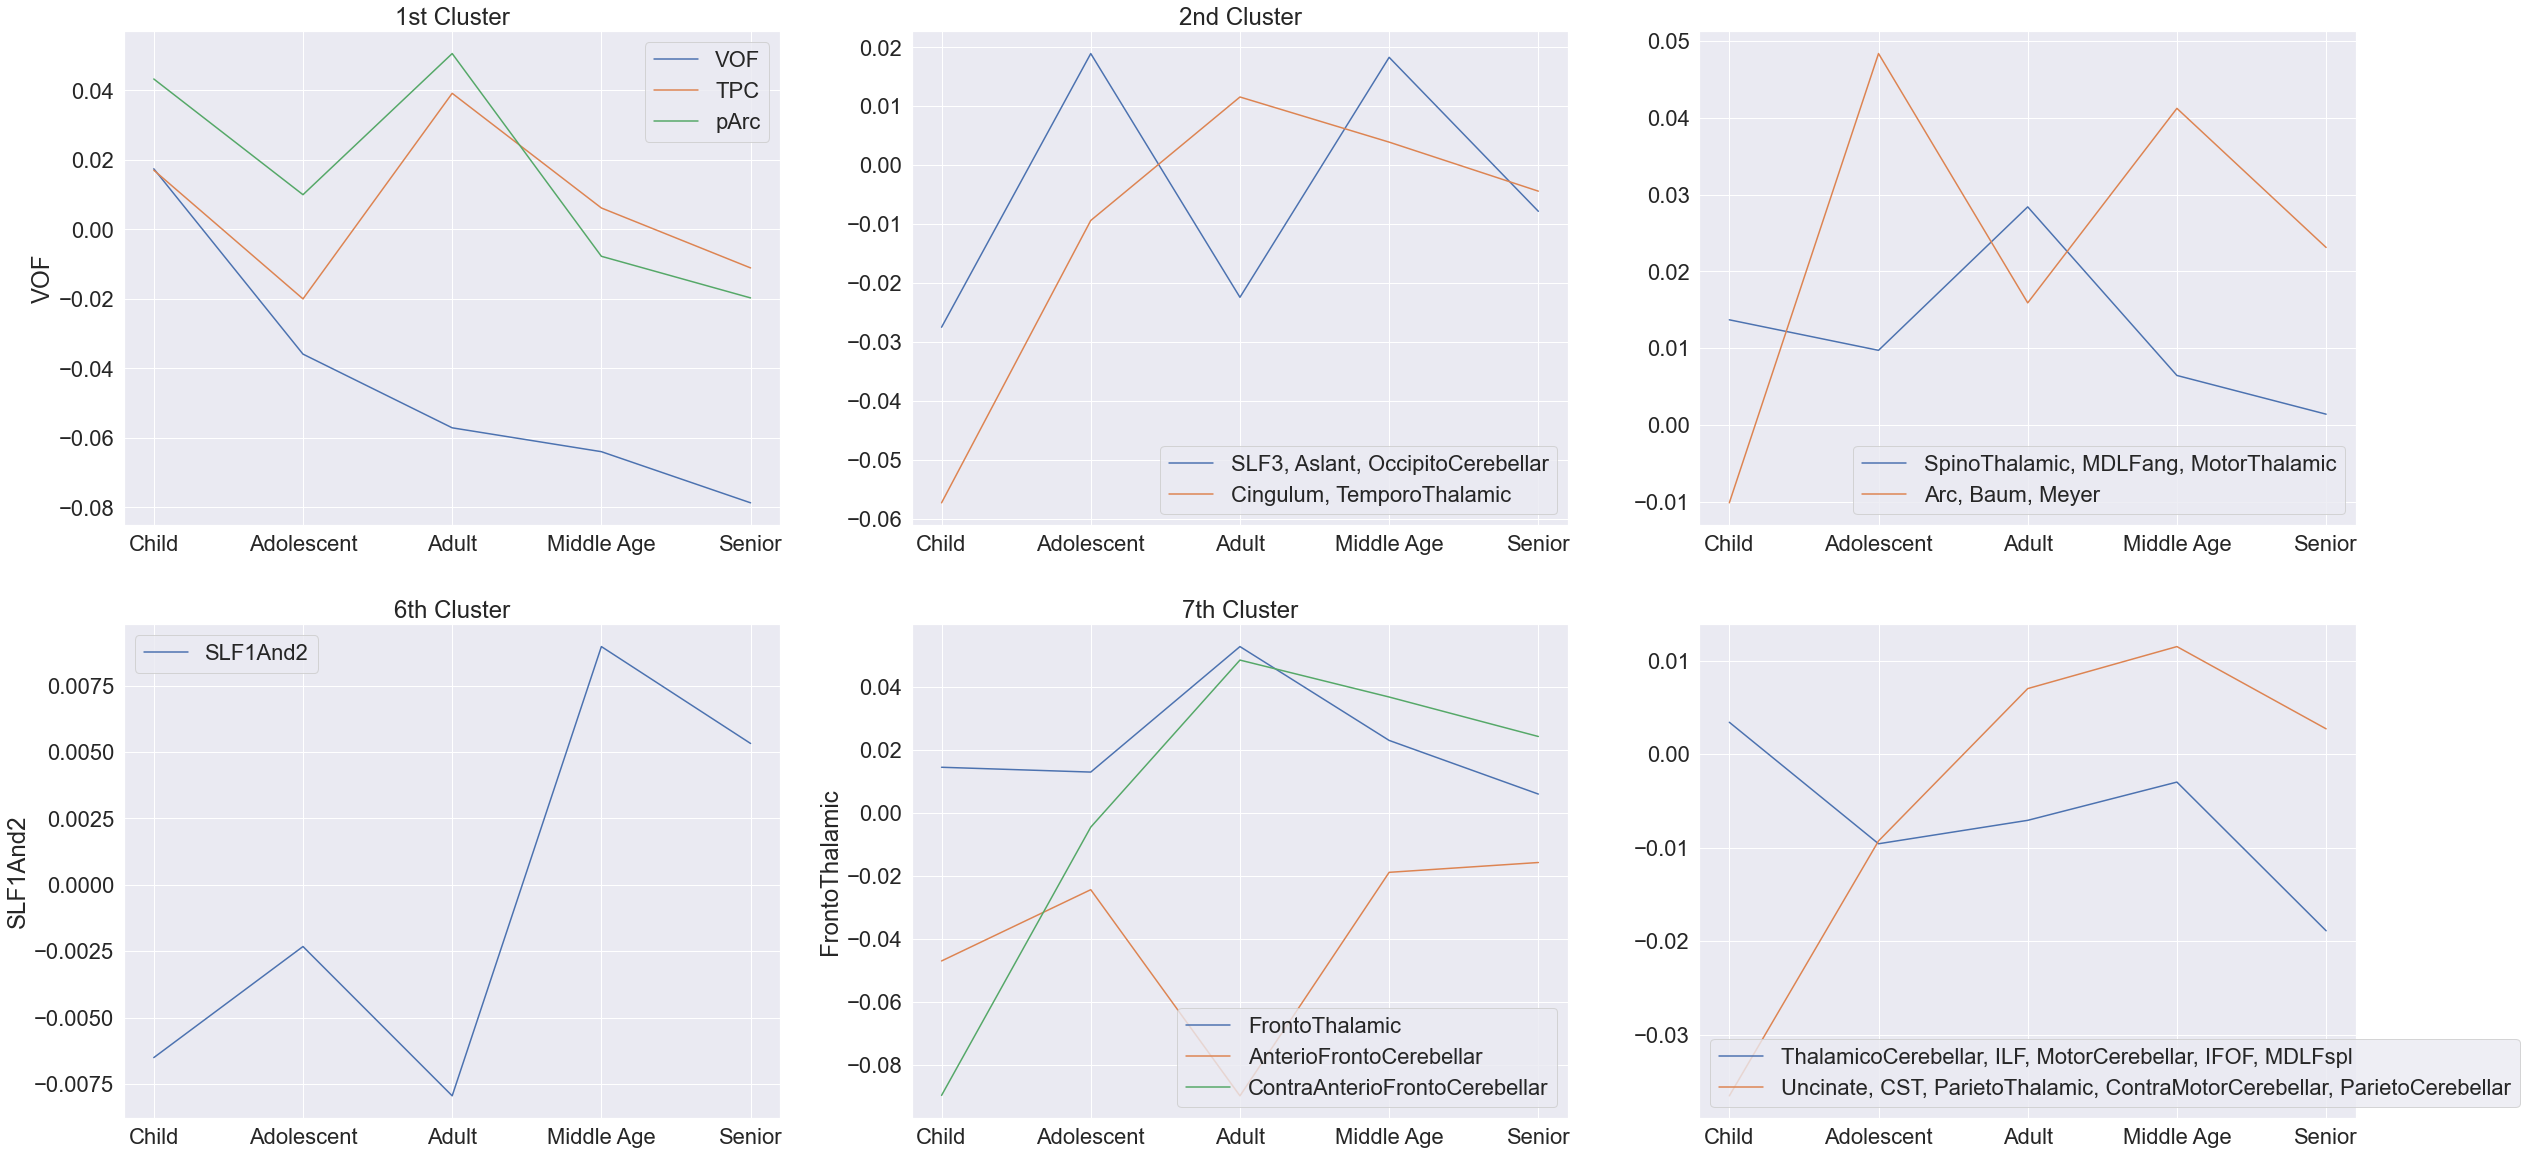

In [22]:
fig3, ax3 = plt.subplots(2, 3, figsize=(40, 20))

sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'VOF', label='VOF',
            ax= ax3[0][0]).set(title='1st Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'TPC', label = 'TPC',ax= ax3[0][0])
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'pArc', label = 'pArc', ax= ax3[0][0])


sns.lineplot(data=slasoc_comb,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y= slasoc_comb, label='SLF3, Aslant, OccipitoCerebellar',
            ax= ax3[0][1]).set(title='2nd Cluster')
sns.lineplot(data=cingT,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = cingT, label = 'Cingulum, TemporoThalamic',ax= ax3[0][1])

sns.lineplot(data=spinmdmotor,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = spinmdmotor, label = 'SpinoThalamic, MDLFang, MotorThalamic', ax= ax3[0][2])
sns.lineplot(data=arcbamey,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = arcbamey, label = 'Arc, Baum, Meyer', ax= ax3[0][2])

sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'SLF1And2', label='SLF1And2',
            ax= ax3[1][0]).set(title='6th Cluster')

sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'FrontoThalamic', label='FrontoThalamic',
            ax= ax3[1][1]).set(title='7th Cluster')
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'AnterioFrontoCerebellar', label='AnterioFrontoCerebellar',ax= ax3[1][1])
sns.lineplot(data=transposed,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = 'ContraAnterioFrontoCerebellar', label='ContraAnterioFrontoCerebellar',ax= ax3[1][1])

sns.lineplot(data=thilmotifmdl,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = thilmotifmdl, label='ThalamicoCerebellar, ILF, MotorCerebellar, IFOF, MDLFspl',ax= ax3[1][2])
sns.lineplot(data=uncstparcontrapar,  x = ['Child', 'Adolescent', 'Adult','Middle Age','Senior'], y = uncstparcontrapar, label='Uncinate, CST, ParietoThalamic, ContraMotorCerebellar, ParietoCerebellar',ax= ax3[1][2])
